<a href="https://colab.research.google.com/github/mnaveed8167/Deep-Learning/blob/main/ANN_from_scratch_using_churn_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

Part 1- Data preprocessing

In [ ]:
# importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/Churn_Modelling.csv')
dataset.head()



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.shape

(10000, 14)

In [ ]:
x = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [ ]:
# creating a dummpy variable
geography = pd.get_dummies(x['Geography'], drop_first= True)
gender = pd.get_dummies(x['Gender'], drop_first = True)

In [ ]:
# Concat the dataframes
x = pd.concat([x,geography,gender], axis = 1)

In [ ]:
# drop unnecessary columns
x = x.drop(['Geography','Gender'], axis = 1)


In [ ]:
# splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 0)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Part 2- Now lets make the ANN

In [ ]:
#importing the keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [ ]:
# Initializing the ANN
classifier = Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the training set

model_history = classifier.fit(x_train, y_train, validation_split= 0.33, batch_size = 10, epochs = 100)


Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.6128 - accuracy: 0.7873 - val_loss: 0.5379 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5082 - accuracy: 0.7962 - val_loss: 0.4968 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4903 - accuracy: 0.7962 - val_loss: 0.4869 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4795 - accuracy: 0.7962 - val_loss: 0.4782 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4702 - accuracy: 0.7962 - val_loss: 0.4708 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4624 - accuracy: 0.7962 - val_loss: 0.4652 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4559 - accuracy: 0.7962 - val_loss: 0.4601 - val_accuracy: 0.7955

In [ ]:
# list all data in history
print(model_history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


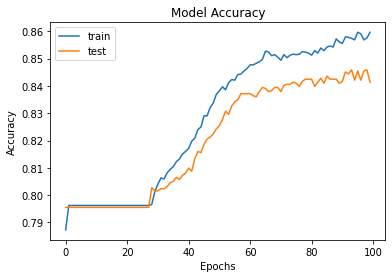

In [ ]:
# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

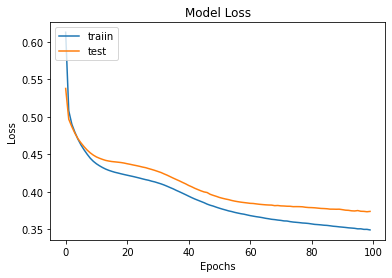

In [ ]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['traiin', 'test'], loc = 'upper left')
plt.show()


Part 3- Making the prediction and evaluating the model 

In [ ]:
# Predicting the test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred>0.5)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1489  106]
 [ 190  215]]


In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.852
